##**Домашнее задание по теме " Корреляция и регрессия"**

**Задание:**

Счастье у каждого своё, но когда данных достаточно много, можно попробовать поискать закономерности :).
Предлагаем этим и заняться.
Для работы используйте датасет “happines_corruption.csv”, приложенный к материалам занятия. Описание столбцов:

Country - Name of the country.
happiness_score - Average of responses to the primary life evaluation question from the Gallup World Poll (GWP). 0-10
gdp_per_capita - The extent to which GDP contributes to the calculation of the Happiness Score.
family - The extent to which Family contributes to the calculation of the Happiness Score
health - The extent to which Life expectancy contributed to the calculation of the Happiness Score
freedom - The extent to which Freedom contributed to the calculation of the Happiness Score
generosity - A numerical value calculated based on poll participants’ perceptions of generosity in their country.
government_trust - The extent to which Perception of Corruption contributes to Happiness Score.
dystopia_residual - A score based on a hypothetical comparison to the world’s saddest country.
continent - Region of the country.
Задание 1

Базово изучите датасет (достаточно методов info() и describe()).
Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.
Желательно, но не обязательно:
Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.
Задание 2
Продолжаем изучать цены на газ в Южной Корее. Файл с данными “gas_sales_data.csv” вы сможете найти в материалах занятия (для этого набора данных вы ранее рассчитывали коэффициенты корреляции в тренажере).

В этом задании нужно окончательно ответить на вопрос:
Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?

Для этого:

Оставьте только два столбца:'Temperature' и 'Sum'.
Постройте диаграмму рассеяния.
Постройте модель линейной регрессии для выбранных признаков.
Рассчитайте точность модели на тестовой выборке.
Выведите график остатков.
Требования по оформлению графиков:
У графиков должен быть заголовок, подписи осей, легенда (опционально). Каждая визуализация должным образом оформлена и может быть интерпретирована даже в отрыве от контекста.
Важно!
Оставляйте свои комментарии к графикам: отвечает ли визуализация на поставленный вопрос, что вы наблюдаете в данных, какие выводы можно сделать и т.д. Ход ваших мыслей так же важен, как и написанный вами код.

Примечание:
Домашнее задание сдается ссылкой Google Colab. Мы не сможем проверить его или помочь, если вы пришлете:

файлы;
архивы;
скриншоты кода.
Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

Как правильно задавать вопросы аспирантам, преподавателям и коллегам:
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.
Сформулируйте вопрос по алгоритму:

Что я делаю?
Какого результата я ожидаю?
Как фактический результат отличается от ожидаемого?
Что я уже попробовал сделать, чтобы исправить проблему?
По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

**Решение:**

Задание 1
Базово изучите датасет (достаточно методов info() и describe()).
Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.
Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as pl

In [ ]:
df1 = pd.read_csv('happines_corruption.csv')
df1

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24


Описание столбцов:

Страна - Название страны.
happiness_score - Среднее значение ответов на основной вопрос об оценке жизни, полученный в ходе Всемирного опроса Gallup (GWP). 0-10
gdp_per_capita - Степень, в которой ВВП влияет на расчет показателя счастья.
семья - Степень, в которой семья влияет на расчет показателя счастья
здоровье - Степень, в которой ожидаемая продолжительность жизни влияет на расчет показателя счастья
свобода - Степень, в которой Свобода влияет на расчет показателя счастья
щедрость - Числовое значение, рассчитанное на основе представлений участников опроса о щедрости в их стране.
government_trust - Степень, в которой восприятие коррупции влияет на оценку счастья.
dystopia_residual - Оценка, основанная на гипотетическом сравнении с самой печальной страной в мире.
континент - регион страны.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [ ]:
df1.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


Выдвинем две гипотезы:

Зависит ли счастье от здоровья?                                              

Зависит ли счастье от свободы?

<Axes: xlabel='health', ylabel='happiness_score'>

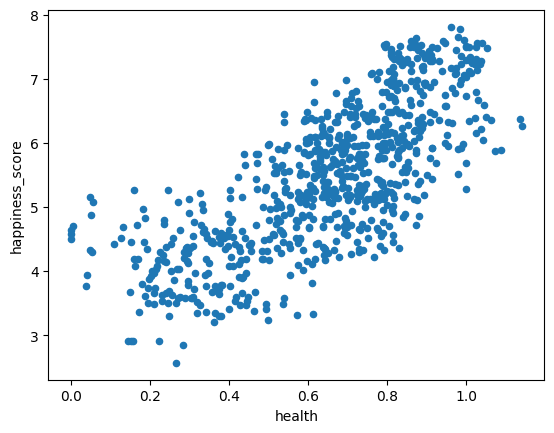

In [ ]:
df1.plot(kind='scatter', x='health', y='happiness_score')

Text(0.5, 0.98, 'Зависимость счастья от здоровья')

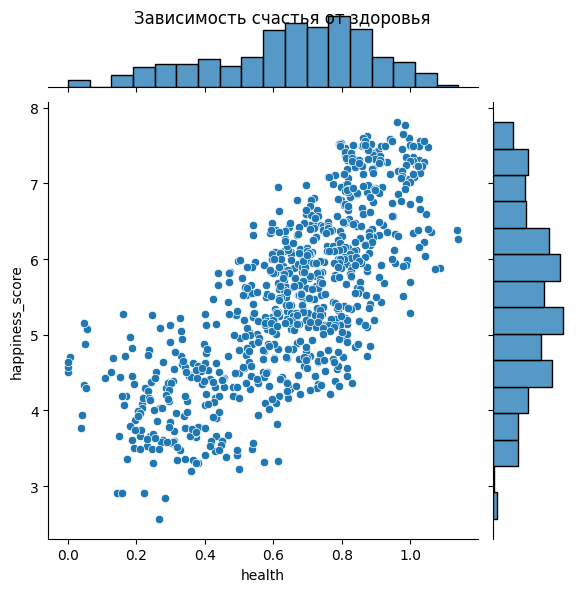

In [ ]:
sns.jointplot(x='health', y ='happiness_score', data=df1).fig.suptitle('Зависимость счастья от здоровья')

In [ ]:
# считаем коэф. корреляции Пирсона
df1[['happiness_score', 'health']].corr()

,happiness_score,health
happiness_score,1.000000,0.753534
health,0.753534,1.000000


Достаточно высокая корреляция между здоровьем и счастьем, что видно из графика

Text(0.5, 0.98, 'Зависимость счастья от свободы')

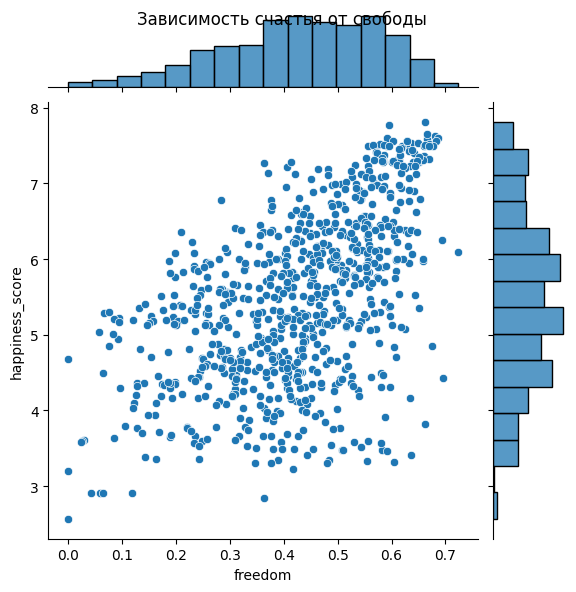

In [ ]:
sns.jointplot(x='freedom', y ='happiness_score', data=df1).fig.suptitle('Зависимость счастья от свободы')

In [ ]:
df1[['happiness_score', 'freedom']].corr()

,happiness_score,freedom
happiness_score,1.000000,0.544284
freedom,0.544284,1.000000


Корреляция есть, можно говорить о том, что ощущение счастья зависит от свободы.

In [ ]:
df1[df1.columns.difference(['Country', 'continent'])].corr()

,Year,cpi_score,dystopia_residual,family,freedom,gdp_per_capita,generosity,government_trust,happiness_score,health,social_support
Year,1.000000,-0.001460,0.057519,-0.588630,0.058195,-0.035782,-0.109797,0.021781,0.023495,0.070172,0.448616
cpi_score,-0.001460,1.000000,0.032630,0.132031,0.482923,0.704483,0.165972,0.620089,0.693001,0.644478,0.109077
dystopia_residual,0.057519,0.032630,1.000000,0.600243,-0.015270,0.042710,0.147750,0.098366,0.174161,-0.073157,-0.654570
family,-0.588630,0.132031,0.600243,1.000000,0.013833,0.218191,0.245437,0.114767,0.154946,-0.054683,-0.869885
freedom,0.058195,0.482923,-0.015270,0.013833,1.000000,0.340260,0.306240,0.473980,0.544284,0.381869,0.208709
gdp_per_capita,-0.035782,0.704483,0.042710,0.218191,0.340260,1.000000,-0.018355,0.359068,0.793267,0.774980,0.111701
generosity,-0.109797,0.165972,0.147750,0.245437,0.306240,-0.018355,1.000000,0.280039,0.155419,-0.028882,-0.215131
government_trust,0.021781,0.620089,0.098366,0.114767,0.473980,0.359068,0.280039,1.000000,0.455477,0.312741,-0.008136
happiness_score,0.023495,0.693001,0.174161,0.154946,0.544284,0.793267,0.155419,0.455477,1.000000,0.753534,0.192633
health,0.070172,0.644478,-0.073157,-0.054683,0.381869,0.774980,-0.028882,0.312741,0.753534,1.000000,0.347438


[Text(0.5, 1.0, 'Тепловая карта корреляций')]

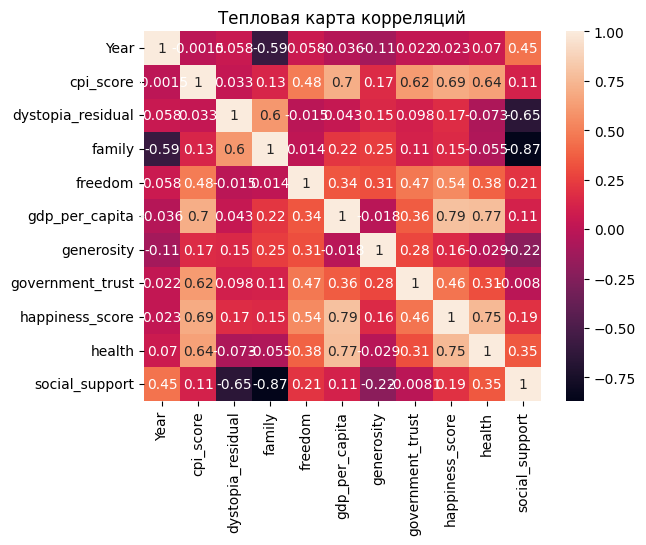

In [ ]:
sns.heatmap(df1[df1.columns.difference(['Country', 'continent'])].corr(), annot=True).set(title='Тепловая карта корреляций')

Задание 2
Продолжаем изучать цены на газ в Южной Корее. Файл с данными “gas_sales_data.csv” вы сможете найти в материалах занятия (для этого набора данных вы ранее рассчитывали коэффициенты корреляции в тренажере).

В этом задании нужно окончательно ответить на вопрос:

Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?
Для этого:

Оставьте только два столбца:'Temperature' и 'Sum'.
Постройте диаграмму рассеяния.
Постройте модель линейной регрессии для выбранных признаков.
Рассчитайте точность модели на тестовой выборке.
Выведите график остатков.

In [ ]:
df2 = pd.read_csv('gas_sales_data.csv')
df2

,Year,Month,Temperature,Gangwondo,Seoul,Gyeonggido,Incheon,Gyeongsangnamdo,Gyeongsangbukdo,Gwangju,...,Daejeon,Busan,Sejong,Ulsan,Jeollanamdo,Jeollabukdo,Jeju,Chungcheongnamdo,Chungcheongbukdo,Sum
0,2000,1,-1.20,16219,662424,363014,139454,42129,55362,39465,...,52992,85787,0,69241,22508,34507,0,20158,27838,1717175
1,2000,2,-0.99,16280,689177,375937,145834,42604,52863,40674,...,53950,87282,0,70910,22310,33784,0,23492,27175,1766341
2,2000,3,6.64,14105,566528,323145,121324,35990,47282,34610,...,41898,74476,0,63627,18033,29315,0,21156,22904,1490537
3,2000,4,12.11,10364,396231,237437,91421,28698,40393,25898,...,28618,58316,0,47106,15920,19783,0,17447,16818,1096964
4,2000,5,17.59,6843,262940,169495,67239,21073,35083,18426,...,17503,45915,0,43749,13808,14375,0,14508,12299,790248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020,8,27.00,19076,163032,255222,70646,60523,84646,27561,...,31906,70508,5599,94251,49039,43885,1506,70181,49460,1142099
248,2020,9,21.40,18822,147556,243817,72542,65264,88652,28120,...,30307,70849,6069,101433,54253,48190,1179,86971,53589,1160655
249,2020,10,14.90,25946,213556,339823,78654,75071,103757,39428,...,42001,85283,10268,119332,60416,61328,1414,109095,61315,1471242
250,2020,11,9.00,35632,375289,497221,115663,101609,135432,58120,...,69624,122943,12087,147792,68793,82360,2161,142556,82499,2116835


In [ ]:
df2_2 = df2[['Temperature', 'Sum']]
df2_2

,Temperature,Sum
0,-1.20,1717175
1,-0.99,1766341
2,6.64,1490537
3,12.11,1096964
4,17.59,790248
...,...,...
247,27.00,1142099
248,21.40,1160655
249,14.90,1471242
250,9.00,2116835


Text(0.5, 0.98, 'Зависимость потребления газа от температуры в Южной Корее')

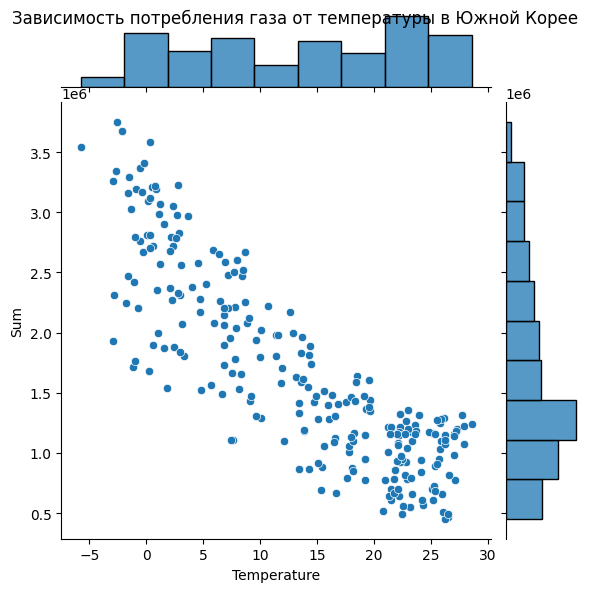

In [ ]:
sns.jointplot(x='Temperature', y ='Sum', data=df2_2).fig.suptitle('Зависимость потребления газа от температуры в Южной Корее')

In [ ]:
lr2 = LinearRegression()
X = df2_2[['Temperature']]
y = df2_2['Sum']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
lr2.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr2.coef_, lr2.intercept_

(array([-69076.75093714]), 2586224.536962443)

In [ ]:
lr2.score(X_test, y_test)

0.745771011472523

In [ ]:
predict = lr2.predict(X_test)

[Text(0.5, 1.0, 'Распределение остатков')]

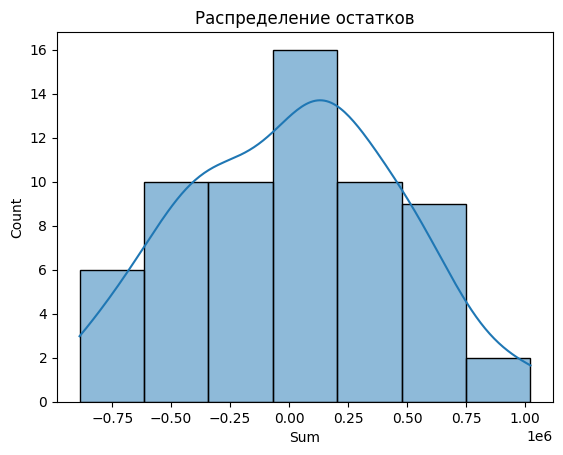

In [ ]:
sns.histplot((y_test-predict), kde=True).set(title='Распределение остатков')